## <a name="content">Содержание</a>
- [0. Знакомство с проектом](#0)
 - [0.1. Описание проекта](#0.1)
 - [0.2. Описание данных](#0.2)
 - [0.3. Подключение библиотек](#0.3)
- [1. (Шаг 1) Изучение общей информации о датафрейме](#1)
 - [1.1. Промежуточный вывод](#1.1)
- [2. (Шаг 2) Подготовка данных](#2)
 - [2.1. Замена названий столбцов (нижний регистр)](#2.1)
 - [2.2. Преобразование типа данных столбца year_of_release](#2.2)
   - [2.2.1. Преобразование типа данных столбца user_score](#2.2.1)
 - [2.3. Обработка пропусков](#2.3)
 - [2.4. Создание столбца total_sales с суммарными продажами во всех регионах](#2.4)
 - [2.5. Промежуточный вывод](#2.5)
- [3. (Шаг 3) Исследовательский анализ данных](#3)
 - [3.1. Количество выпущенных игр в разные годы](#3.1)
 - [3.2. Как менялись продажи по платформам](#3.2)
 - [3.3. Как менялись продажи игр по платформам и годам. Сколько живут игровые платформы](#3.3)
 - [3.4. Определение актуального периода](#3.4)
 - [3.5. График «ящик с усами» по глобальным продажам игр в разбивке по платформам](#3.5)
 - [3.6. Как влияют на продажи отзывы пользователей и критиков внутри одной популярной платформы](#3.6)
 - [3.7. Общее распределение игр по жанрам](#3.7)
 - [3.8. Промежуточный вывод](#3.8)
- [4. Шаг 4. Составьте портрет пользователя каждого региона](#4)
 - [4.1. Самые популярные платформы (топ-5) для каждого региона](#4.1)
 - [4.2. Самые популярные жанры (топ-5) для каждого региона](#4.2)
 - [4.3. Влияние рейтинга ESRB на продажи для каждого региона](#4.3)
 - [4.4. Промежуточный вывод](#4.4)
- [5. Шаг 5. Проверка гипотез](#5)
 - [5.1. Гипотеза о равенстве пользовательских оценок платформ Xbox One и PC](#5.1)
 - [5.2. Гипотеза о равенстве пользовательских оценок жанров Action и Sport](#5.2)
- [6. Шаг 6. Общий вывод](#6)

<hr>

### 0. Знакомство с проектом  <a name="0"></a>  


#### 0.1. Описание проекта  <a name="0.1"></a>  
<a class="btn btn-primary btn-sm" href="#content" role="button">Вернуться к содержанию</a>

Мы работаем в интернет-магазине **«Стримчик»**, который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, **Xbox** или **PlayStation**). Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.    

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Не важно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.    

В наборе данных попадается аббревиатура **ESRB (Entertainment Software Rating Board)** — это ассоциация, определяющая возрастной рейтинг компьютерных игр. **ESRB** оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

<a name="0.2"></a>
#### 0.1. Описание данных
<a class="btn btn-primary btn-sm" href="#content" role="button">Вернуться к содержанию</a>

- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы долларов)
- `EU_sales` — продажи в Европе (миллионы долларов)
- `JP_sales` — продажи в Японии (миллионы долларов)
- `Other_sales` — продажи в других странах (миллионы долларов)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.   
*Данные за 2016 год могут быть неполными.*

<a name="0.3"></a>
#### 0.3. Подключение библиотек
<a class="btn btn-primary btn-sm" href="#content" role="button">Вернуться к содержанию</a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st

<hr>

<a name="1"></a>
### 1. (Шаг 1) Изучение общей информации о датафрейме
<a class="btn btn-primary btn-sm" href="#content" role="button">Вернуться к содержанию</a>    

Загружаем данные:

In [2]:
df = pd.read_csv('/datasets/games.csv')

In [3]:
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<a name="1.1"></a>
#### 1.1. Промежуточный вывод
<a class="btn btn-primary btn-sm" href="#content" role="button">Вернуться к содержанию</a>    

Сразу же в первых строках датафрейма видно пропущенные значения. Большой объем пропусков в столбцах `Critic_Score`, `User_Score` и `Rating`. Помимо этого, необходимо привести все названия столбцов к нижнему регистру для удобства работы с ними. Столбец `Year_of_Release` имеет тип данных **float**, а нужен **int**. Столбец `User_Score` имеет тип **object**, хотя там хранятся оценки в численном виде. 

<hr>

<a name="2"></a>
### 2. (Шаг 2) Подготовка данных
<a class="btn btn-primary btn-sm" href="#content" role="button">Вернуться к содержанию</a>    

<a name="2.1"></a>
#### 2.1. Замена названий столбцов (нижний регистр)
<a class="btn btn-primary btn-sm" href="#content" role="button">Вернуться к содержанию</a>    

Для удобства приведем названия столбцов к нижнему регистру:

In [5]:
df.columns = df.columns.str.lower()

<a name="2.2"></a>
#### 2.2. Преобразование типа данных столбца year_of_release
<a class="btn btn-primary btn-sm" href="#content" role="button">Вернуться к содержанию</a>    

Столбец с годом выпуска имеет вещественный тип данных, а год не может быть записан в таком виде. Преобразуем его в целочисленный:

In [6]:
df['year_of_release'] = df['year_of_release'].astype('Int64')

<a name="2.2.1"></a>
#### 2.2.1. Преобразование типа данных столбца user_score
<a class="btn btn-primary btn-sm" href="#content" role="button">Вернуться к содержанию</a>    

Столбец с оценками пользователей имеет строковый тип данных. Предположим, что в строках данного столбца есть буквенные записи, т.к. в ином случае тип данных был бы float.

In [7]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

И действительно, среди всех числовых значений находится аббревиатура *tbd*. На сайте, собирающем отзывы о музыкальных альбомах, играх, фильмах, телевизионных шоу, DVD-дисках и мобильных играх **metacritic.com** можно найти [расшифровку этой аббревиатуры](https://www.metacritic.com/faq#item13). Предпологается, что если если количество отзывов меньше 4, то ставится такая метка. Так как данное слово равносильно пропуску, заменим значение *tbd* на **NaN** и приведем данные к типу **float**.

In [8]:
df['user_score'] = df['user_score'].map({'tbd': 'NaN'}).fillna(df['user_score'])
df['user_score'] = df['user_score'].astype('float')

<a name="2.3"></a>
#### 2.3. Обработка пропусков
<a class="btn btn-primary btn-sm" href="#content" role="button">Вернуться к содержанию</a>    

Столбец с названием игр `name` имеет 2 пропуска, удалим их.

In [9]:
df.dropna(subset = ['name'], inplace = True)

В 3-х столбцах о рейтинге игр находится много пропусков. Предположим, что они взаимосвязаны:

In [10]:
df.query('critic_score.isnull() & rating.isnull() & user_score.isnull()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [11]:
df.isnull().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating             6764
dtype: int64

Предположение неверно. Заменять их медианной или средним значением в данном случае будет некорректно. В таком случае промаркируем столбцы `critic_score, user_score` и `rating` значениеv **-1** для дальнейшего удобства в анализе. Столбец года выпуска `year_of_release` также содержит 269 пропусков. Проставить настоящий год выпуска для 269 игр трудоемкая задача, не будем так делать, а лучше промаркируем их -1 соответственно.

In [12]:
#data = df.pivot_table(index = 'year_of_release', columns = 'platform', values = 'total_sales', aggfunc = 'sum')

In [13]:
columns = ['critic_score', 'user_score', 'rating', 'year_of_release']
for column in columns:
    df[column] = df[column].fillna(-1)

In [14]:
for column in ['critic_score', 'user_score', 'rating', 'year_of_release']:
    print('Количество пропусков в столбце {} - {}'.format(column, df[column].isnull().sum()))

Количество пропусков в столбце critic_score - 0
Количество пропусков в столбце user_score - 0
Количество пропусков в столбце rating - 0
Количество пропусков в столбце year_of_release - 0


 <a name="2.4"></a>
#### 2.4. Создание столбца total_sales с суммарными продажами во всех регионах
<a class="btn btn-primary btn-sm" href="#content" role="button">Вернуться к содержанию</a>    

Посчитаем суммарные продажи во всех регионах и запишим их в отдельный столбец `total_sales`:

In [15]:
df['total_sales'] = 0
for column in ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']:
    df['total_sales'] += df[column]

<a name="2.5"></a>
#### 2.5. Промежуточный вывод
<a class="btn btn-primary btn-sm" href="#content" role="button">Вернуться к содержанию</a>    

Таким образом было сделано следующее:
1. Приведены к нижниме регистру названия столбцов
2. Преобразован тип данных для столбцов `year_of_release` и `user_score`. В столбце `user_score` были обнаружены значения *tbd*, что означет to be determined (будет определенна)
3. Удалены незначительное количество пропусков для столбца `name`. Промаркированы **-1** пропуски для столбцов `critic_score`, `user_score` и `rating`. Избавились от всех пропусков
4. Посчитаны суммарные продажи во всех регионах в столбце `total_sales`.
----


<a name="3"></a>
### 3. (Шаг 3) Исследовательский анализ данных
<a class="btn btn-primary btn-sm" href="#content" role="button">Вернуться к содержанию</a>    

<a name="3.1"></a>
#### 3.1. Количество выпущенных игр в разные годы
<a class="btn btn-primary btn-sm" href="#content" role="button">Вернуться к содержанию</a>    

Посчитаем количество проданных игр с группировкой по годам и построим график распределения продаж:

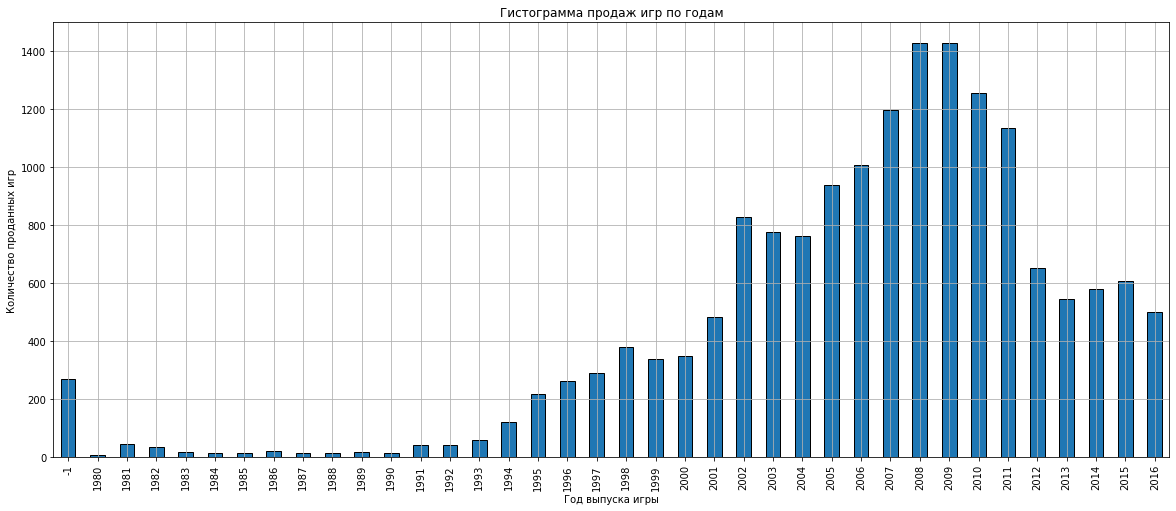

In [16]:
ax = df.groupby(['year_of_release'])['total_sales'].count().plot(kind = 'bar', ec='black', figsize = (20, 8), grid = True)
ax.set(title = 'Гистограмма продаж игр по годам', ylabel = 'Количество проданных игр', xlabel = 'Год выпуска игры')
plt.show()

Видно из графика, что до **1994** года игры почти не продавались, после начинается скачок с развитием MS-DOS и Windows. Пик продаж приходится на **2008** - **2009** года. После начинается снижение продаж, предположительно в связи с развитием рынка смартфонов и мобильных игр.


<a name="3.2"></a>
#### 3.2. Как менялись продажи по платформам
<a class="btn btn-primary btn-sm" href="#content" role="button">Вернуться к содержанию</a>    

Посмотрим как менялись продажи игр для разных платформ:

In [17]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected = True)
# произведем подсчет и подготовим датасет
platforms_df = df.groupby('platform')[['total_sales']].sum().join(
    df.groupby('platform')[['name']].count()
)
platforms_df.columns = ['total_sales', 'number_of_games']
platforms_df.sort_values('total_sales', ascending = False, inplace = True)

In [18]:
# создаем график для общих продаж
trace2 = go.Bar(
    x=platforms_df.index,
    y=platforms_df['total_sales'],
    name='Всего продано'
)

# создаем график для выпущенных игр
trace3 = go.Bar(
    x=platforms_df.index,
    y=platforms_df['number_of_games'],
    name='Число выпущенных игр'
)

# соединяем данные и стили
data = [trace2, trace3]
layout = {'title': 'График выпуска и продаж игр по платформам (динамический)'}

# создаем фигуру и рисуем график
fig = go.Figure(data = data, layout = layout)
iplot(fig, show_link = False)
plt.show()

Лидерами по продажам можно выделить 6 платформ: **PS2, X360, PS3, Wii, DS, PS**.



<a name="3.3"></a>
#### 3.3. Как менялись продажи игр по платформам и годам. Сколько живут игровые платформы
<a class="btn btn-primary btn-sm" href="#content" role="button">Вернуться к содержанию</a>    

Посмотрим как менялись продажи игр для разных платформ по годам (возьмем актуальные приставки за последний 10-к лет):

In [19]:
data = df.pivot_table(index = 'year_of_release', columns = 'platform', values = 'total_sales', aggfunc = 'sum')
data = data.fillna(0)

In [20]:
data = data[data.index >= 1994]
fig = go.Figure(data=[
    go.Bar(name='DS', x=data.index, y=data['DS']),
    go.Bar(name='3DS', x=data.index, y=data['3DS']), 
    go.Bar(name='PS', x=data.index, y=data['PS']),
    go.Bar(name='PS2', x=data.index, y=data['PS2']),
    go.Bar(name='PS3', x=data.index, y=data['PS3']),
    go.Bar(name='PS4', x=data.index, y=data['PS4']),
    go.Bar(name='PSP', x=data.index, y=data['PSP']),
    go.Bar(name='Wii', x=data.index, y=data['Wii']),
    go.Bar(name='X360', x=data.index, y=data['X360']),
    go.Bar(name='XB', x=data.index, y=data['XB']),
    go.Bar(name='XOne', x=data.index, y=data['XOne']),
    go.Bar(name='PC', x=data.index, y=data['PC'])
])
# отображение столбцов
fig.update_layout(barmode='stack')
fig.show()

- PS2 прожила 10 лет, с 2000 по 2010 год
- X360 прожила 10 лет, с 2005 по 2015 год
- Wii - 9 лет, с 2006 по 2015 год
- PS - 9 лет, с 1994 по 2003 год
- DS прожила 8 лет, с 2004 по 2012 год
- PS3 - 10 лет, с 2006 по 2016 год
- PS4 с 2013 года по настоящее время.

В среднем платформы живут **9 лет**. Они бы жили и больше, если бы технологии так стремительно не развивались и не выходили новые игровые платформы.

<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>

Ок, но для отображения также стоило использовать groupby или аналогичные инструменты для группировки.

<a name="3.4"></a>
#### 3.4. Определение актуального периода
<a class="btn btn-primary btn-sm" href="#content" role="button">Вернуться к содержанию</a>    

Необходимо выбрать актуальный период для прогнозирования продаж на **2017** год. Предположим, что актуальный период находится на временно отрезке с **2012** года по **2016**. Начиная с этого года уже вышли (или вот-вот выйду) все популярные и актуальные на настоящиий моменнт игровые платформы. На данном отрезке предсталены данные для всех популярных платформ.

Построим график продаж игр для разных платформ по годам на актульный период:

<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>

Хорошо, актуальный период выделен верно.

In [21]:
data = data[data.index >= 2012]

In [22]:
fig = go.Figure(data=[
    go.Bar(name='DS', x=data.index, y=data['DS']),
    go.Bar(name='3DS', x=data.index, y=data['3DS']), 
    go.Bar(name='PS', x=data.index, y=data['PS']),
    go.Bar(name='PS2', x=data.index, y=data['PS2']),
    go.Bar(name='PS3', x=data.index, y=data['PS3']),
    go.Bar(name='PS4', x=data.index, y=data['PS4']),
    go.Bar(name='PSP', x=data.index, y=data['PSP']),
    go.Bar(name='Wii', x=data.index, y=data['Wii']),
    go.Bar(name='X360', x=data.index, y=data['X360']),
    go.Bar(name='XB', x=data.index, y=data['XB']),
    go.Bar(name='XOne', x=data.index, y=data['XOne']),
    go.Bar(name='PC', x=data.index, y=data['PC'])
])
# Change the bar mode
fig.update_layout(barmode='stack')
fig.show()

Ответим на вопрос "Какие платформы лидируют по продажам, растут или падают?"

Исходя из данных можно отметить, что абсолютно все продажи игр падают каждый год. Лидером по продажам сейчас является **PS4**, она находится в активной коммерческой фазе. **XOne** теряет продажи с 2015 года. Лидеры продаж 2013 года **PS3** и **X360**, к 2016 году практически ушли с рынка.

<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>

Актуальные платформы выделены правильно.

<a name="3.5"></a>
#### 3.5. График «ящик с усами» по глобальным продажам игр в разбивке по платформам
<a class="btn btn-primary btn-sm" href="#content" role="button">Вернуться к содержанию</a>    

Посмтром boxplot продаж игр по платформам за актуальный период:

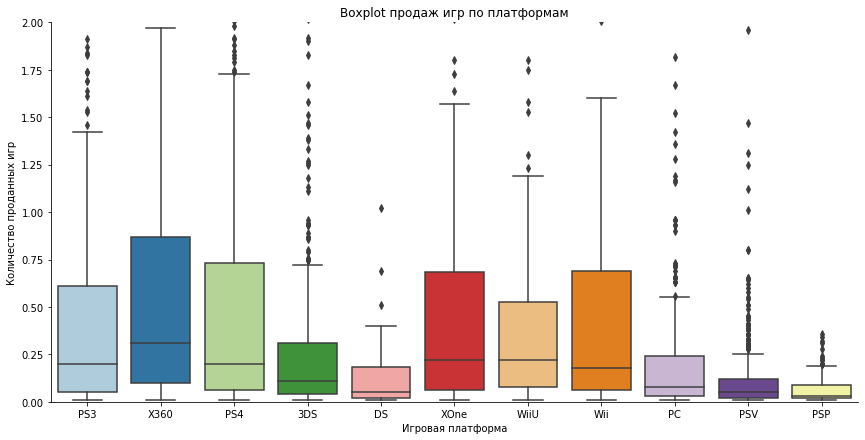

In [23]:
# собираем нужные нам данные
actual_data = df.query('year_of_release >= 2012')
# строим график
ax = sns.catplot(
    x = 'platform', 
    y = 'total_sales', 
    data = actual_data, 
    kind = 'box', 
    height = 6, 
    aspect = 2, 
    palette = 'Paired')
ax.set(title='Boxplot продаж игр по платформам', ylabel='Количество проданных игр', xlabel='Игровая платформа')
plt.ylim(0,2);

Видно, что несомненными лидерами средних продаж являются **Wii**, **WiiU**, **X360**, **PS3**, **PS4** и **XOne**. В активной коммерческой фазе сейчас находятся две последние из перечисленных платформ. Помимо этого, средняя выручка для двух этих платформ практически одинаковая, что справедливо и для этих же консолей старого поколения **X360** и **PS3**, там средняя выручка полностью одинаковая. 

<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>

Отличные ящики с усами.

<a name="3.6"></a>
#### 3.6. Как влияют на продажи отзывы пользователей и критиков внутри одной популярной платформы
<a class="btn btn-primary btn-sm" href="#content" role="button">Вернуться к содержанию</a>    

За популярную платформу возьмем **PS3**. У нее много продаж, много выпущенных игр и она по сей день еще актуальна. Построим диаграмму рассеяния оценок критиков и общих продаж:

<div style="border:solid gold 2px; padding: 20px"> <h1 style="color:gold; margin-bottom:20px">Комментарий наставника</h1>

Ок, но все же стоило взять более актуальную pS4 за базу.

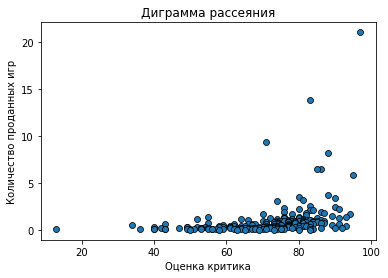

In [24]:
actual_data_ps3 = actual_data.query('platform == "PS3" and critic_score != -1 and user_score != -1')
ax = sns.scatterplot(x = "critic_score", y = "total_sales", data = actual_data_ps3, ec='black')
ax.set(title = 'Диграмма рассеяния', ylabel = 'Количество проданных игр', xlabel = 'Оценка критика');

Вывод интуитивный: c увелечением оценки игры критиком растут продажи игры.

Построим такую же диаграмму дял оценок пользователей:

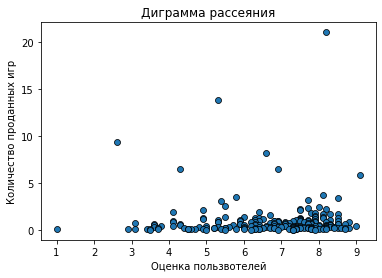

In [25]:
ax = sns.scatterplot(x = 'user_score', y = 'total_sales', data = actual_data_ps3, ec = 'black')
ax.set(title = 'Диграмма рассеяния', ylabel = 'Количество проданных игр', xlabel = 'Оценка пользвотелей');

Картина схожа, с увелечением оценок пользоваталей растут объемы продаж, правда не в такой же степени, как от оценок критиков. Помимо этого наблюдается больше выбросов.

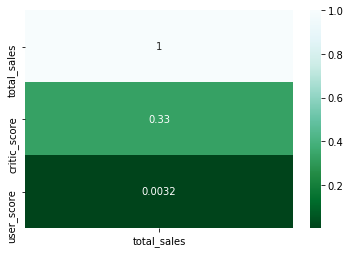

In [26]:
actual_data_ps3_filltered = actual_data_ps3[['critic_score', 'user_score', 'total_sales']]
sns.heatmap(actual_data_ps3_filltered.corr()[['total_sales']]
            .sort_values(by = 'total_sales', ascending = False),
            cmap = "BuGn_r", annot = True);

Коэффицент корреляции продаж и оценок критиков **0.43** (умеренная) от оценок пользователей **0.14** (очень слабая). Видимо у игроков большее доверие вызывает оценка критиком, нежели таким же рядовым пользователем.

Соотнесем вывод с продажами игр для других платформ:

In [27]:
for platform in ['Wii', 'DS', 'X360', 'PS3', 'PS2',
                 'PS4', '3DS', 'PS', 'PC', 'PSP', 'XOne','WiiU']:
    print('\n{0}:'.format(platform))
    for column in ['user_score', 'critic_score']:
        df_temp = actual_data.query('platform == @platform and (user_score != -1) and (critic_score != -1)')
        print('Коэффициент корреляции {0} и total_sales: {1}'.\
              format(column, round(df_temp[column].corr(df_temp['total_sales']), 2)));


Wii:
Коэффициент корреляции user_score и total_sales: 0.01
Коэффициент корреляции critic_score и total_sales: -0.42

DS:
Коэффициент корреляции user_score и total_sales: nan
Коэффициент корреляции critic_score и total_sales: nan

X360:
Коэффициент корреляции user_score и total_sales: -0.0
Коэффициент корреляции critic_score и total_sales: 0.36

PS3:
Коэффициент корреляции user_score и total_sales: 0.0
Коэффициент корреляции critic_score и total_sales: 0.33

PS2:
Коэффициент корреляции user_score и total_sales: nan
Коэффициент корреляции critic_score и total_sales: nan

PS4:
Коэффициент корреляции user_score и total_sales: -0.03
Коэффициент корреляции critic_score и total_sales: 0.41

3DS:
Коэффициент корреляции user_score и total_sales: 0.2
Коэффициент корреляции critic_score и total_sales: 0.31

PS:
Коэффициент корреляции user_score и total_sales: nan
Коэффициент корреляции critic_score и total_sales: nan

PC:
Коэффициент корреляции user_score и total_sales: -0.14
Коэффициент корреля

/opt/conda/lib/python3.7/site-packages/numpy/lib/function_base.py:2551: RuntimeWarning:

Degrees of freedom <= 0 for slice

/opt/conda/lib/python3.7/site-packages/numpy/lib/function_base.py:2480: RuntimeWarning:

divide by zero encountered in true_divide



В основном ситуация аналогична. Получается, что **оценки критиков умеренно влияют на продажи**, а **оценки пользователей очень слабо влияют на продажи**.

<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>

Отличный рассчет анализ и визуализация корреляции.

<a name="3.7"></a>
#### 3.7. Общее распределение игр по жанрам
<a class="btn btn-primary btn-sm" href="#content" role="button">Вернуться к содержанию</a>    

Посмотрим как обстоят дела с продажами у разных жанров. Построим столбчатую диаграмму и ящик с усами для анализа:

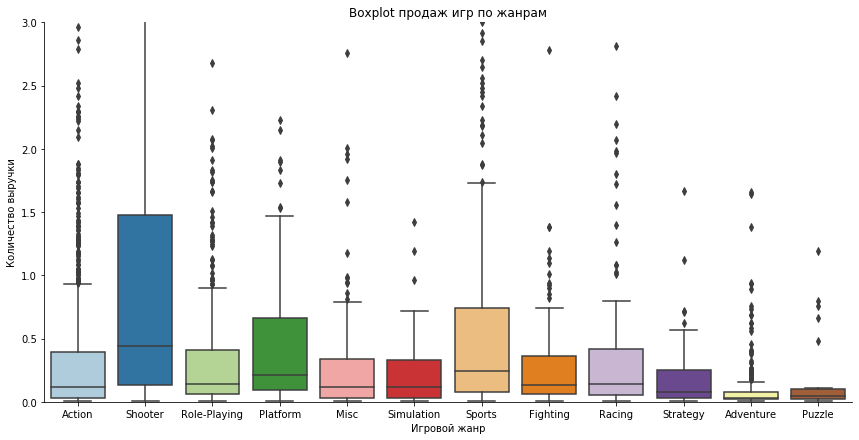

In [28]:
# собираем нужные нам данные
actual_data = df.query('year_of_release >= 2012')
# строим график
ax = sns.catplot(
    x = 'genre', 
    y = 'total_sales', 
    data = actual_data, 
    kind = 'box', 
    height = 6, 
    aspect = 2, 
    palette = 'Paired')
ax.set(title='Boxplot продаж игр по жанрам', ylabel='Количество выручки', xlabel='Игровой жанр')
plt.ylim(0,3);

In [29]:
# соберем временную сводную таблицу для построения графика
temple_pivot = actual_data.pivot_table(
    index = 'genre', values = ['name', 'total_sales'], 
    aggfunc = {'name': 'count', 'total_sales': 'sum'}
).sort_values(by = 'total_sales', ascending = False)


In [30]:
# создаем график для общих продаж
trace0 = go.Bar(
    x=temple_pivot.index,
    y=temple_pivot['name'],
    name='Всего выпущено игр'
)

# создаем график для выпущенных игр
trace1 = go.Bar(
    x=temple_pivot.index,
    y=temple_pivot['total_sales'],
    name='Продано игр'
)

# соединяем данные и стили
data = [trace0, trace1]
layout = {'title': 'Столбчатая диаграмма выпущенных и проданных игр (динамическая)'}

# создаем фигуру и рисуем график
fig = go.Figure(data = data, layout = layout)
iplot(fig, show_link = False)

Выделим 3 самых продаваемых жанра:
1. Action
2. Shooter
3. Role-Playing

Самым прибыльным жанром является **shooter**, правда и на разработка таких игр уходит куда больше средств. В категории самых продаваемых находятся игры, которые не требуют особой усидчивости.     
Наименее продаваемыми жанрами являются **strategy**, **puzzle** и **adventure**. Справедливо заметить, что разработка таких игр, кроме жанра стратегии требуют куда меньше специалистов и средств. Поэтому говорить о большей прибыли жанров преждевременно. Можно только смело утверждать о количестве продаж.

<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>

Жанры проанализированы верно.

<a name="3.8"></a>
#### 3.8. Промежуточный вывод
<a class="btn btn-primary btn-sm" href="#content" role="button">Вернуться к содержанию</a>    

На данном шаге мы выяснили, что средняя продолжительность игровой платформы состовляет **9 лет**. Выделили платформы-лидеры по продажам: PS2, X360, PS3, Wii, DS, PS. Определили актуальный период в отрезке с 2012 по 2016 год, т.к. в этом отрезке находсят все самые популярные платформы. Выяснили, что на продажи игр влияют в больше степени оценки критиков, оценки игроков очень слабо коррелируются с продажами. Определили самые продаваемые жанры (**action, shooter**). Ими оказались игры на реакцию. На разработку таких игр необходимо большое количество ресурсов.
<hr>

<a name="4"></a>
### 4. Шаг 4. Составьте портрет пользователя каждого региона
<a class="btn btn-primary btn-sm" href="#content" role="button">Вернуться к содержанию</a>    

Определим для пользователя каждого региона (NA, EU, JP):
1. Самые популярные платформы (топ-5)
2. Самые популярные жанры (топ-5)
3. Влияние рейтинга ESRB на продажи в отдельном регионе.

<a name="4.1"></a>
#### 4.1. Самые популярные платформы (топ-5) для каждого региона
<a class="btn btn-primary btn-sm" href="#content" role="button">Вернуться к содержанию</a>   

Напишем функцию для построения графиков:

In [31]:
def plot_for_regions(df, groupby, region_sales, ax, ylim):
    # группируем по groupby и сортируем по суммированному reggion_sales
    pivot = (
        df
        .groupby(groupby)
        .agg({region_sales: 'sum'})
        .sort_values(by=region_sales, ascending=False)
        .nlargest(5, region_sales)
    )
    # словарь для названия графиков
    title_dict = {'na_sales': 'Продажи в Северной Америке', 'eu_sales': 'Продажи в Европе', 'jp_sales': 'Продажи в Японии'}
    # словарь цветов
    color_dict = {'na_sales': 'gold', 'eu_sales': 'orange', 'jp_sales': 'goldenrod'}
    # строим график
    plot = pivot.plot(kind='bar', ec='black', title=title_dict[region_sales], ax=axes[ax], 
                   fontsize=18, color=color_dict[region_sales], ylim=ylim)
    plot.set_xlabel('Платформа')

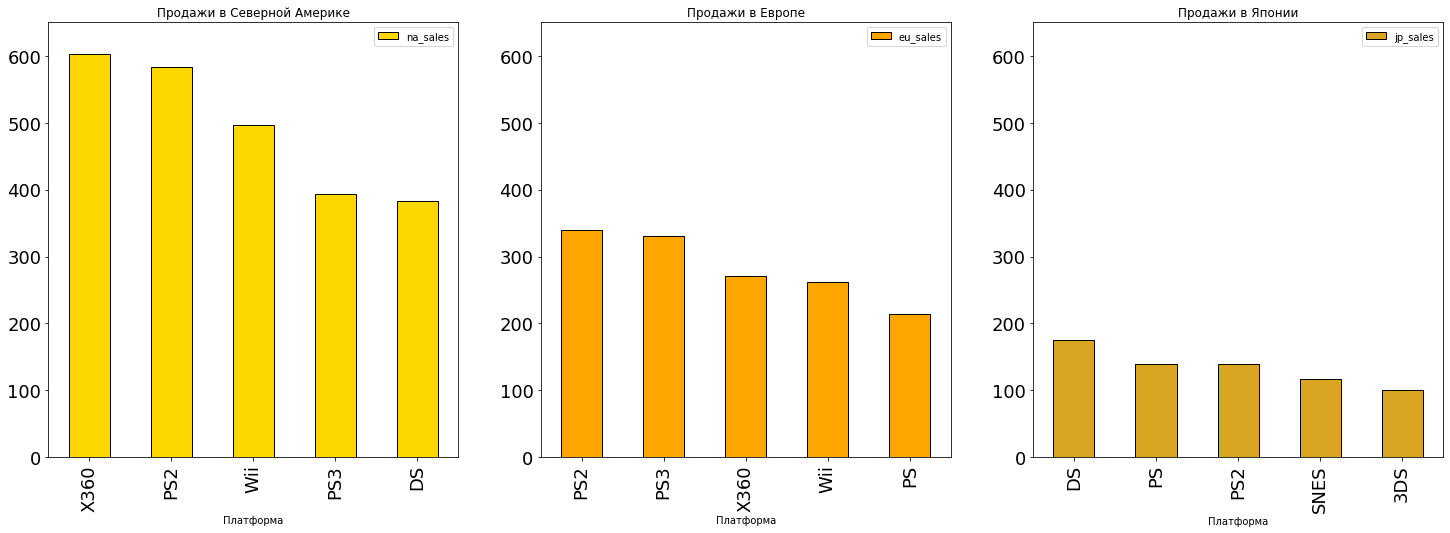

In [32]:
fig, axes = plt.subplots(1, 3, figsize=(25,8))

plot_for_regions(df, 'platform', 'na_sales', 0, (0,650))
plot_for_regions(df, 'platform', 'eu_sales', 1, (0,650))
plot_for_regions(df, 'platform', 'jp_sales', 2, (0,650))

В Северной Америке больше играющего населения, чем в Европе и Японии. Платформы X360 и PS2 имеют больше всего продаж. В Европе лидируют PS2 и PS3, но продаж меньше примерно раза в 2. В Японии в топ-5 попали две портативные приставки от Nintendo (DS и 3DS). Однако с продажами игр там хуже всего. Наименьшее число игроков проживает в Японии. Еще возможно, что там скачивают в обход покупки игры.

<a name="4.2"></a>
#### 4.2. Самые популярные жанры (топ-5) для каждого региона
<a class="btn btn-primary btn-sm" href="#content" role="button">Вернуться к содержанию</a>  

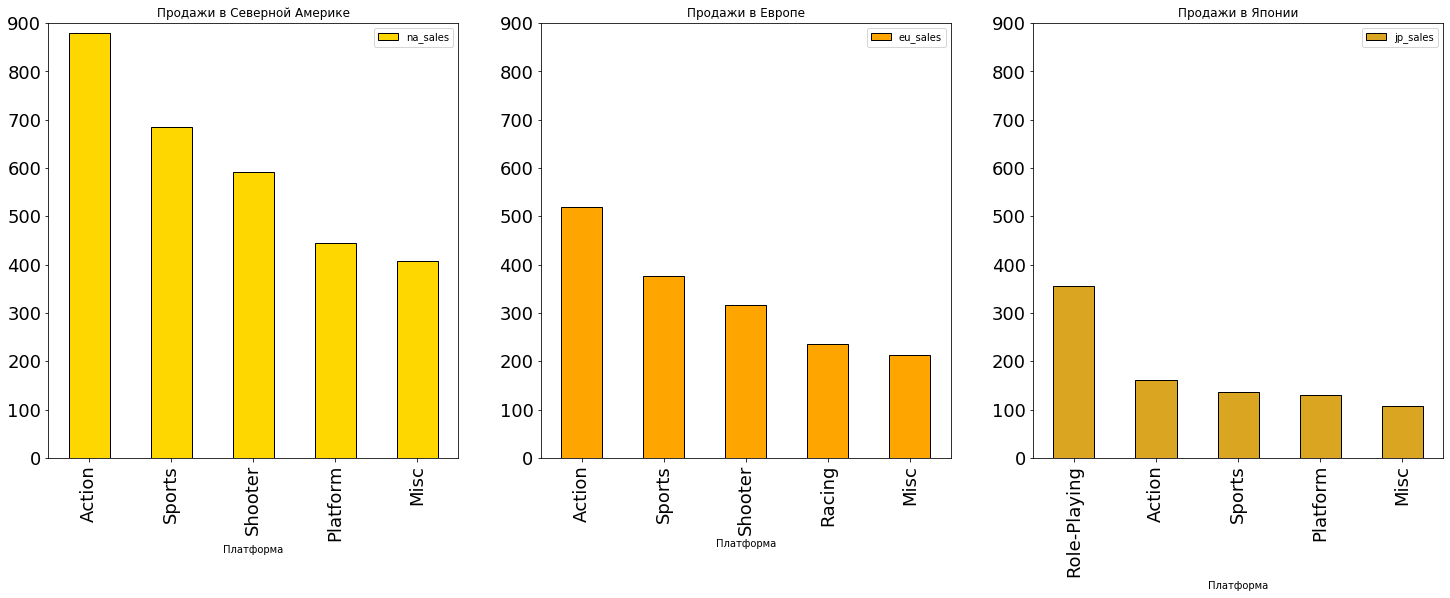

In [33]:
fig, axes = plt.subplots(1, 3, figsize=(25,8))

plot_for_regions(df, 'genre', 'na_sales', 0, (0, 900))
plot_for_regions(df, 'genre', 'eu_sales', 1, (0, 900))
plot_for_regions(df, 'genre', 'jp_sales', 2, (0, 900))

Японцкие пользователи игровых платформм кардинально отличаются от игроков из Севернной Америкии и Европы. Здесь преобладают любители жанра Role-Playing с большиим отрывом от остальных жанров.

В Европе и Северной Америке вкусы игроков схожи, правда стоит отметить, что в Северной Америке больше любителей платформеров, а в Европе - гонок.

И опять же, играющего населения в Америке больше, чем в других представленных регионах.

<a name="4.3"></a>
#### 4.3. Влияние рейтинга ESRB на продажи для каждого региона
<a class="btn btn-primary btn-sm" href="#content" role="button">Вернуться к содержанию</a>   

Рейтинги ESRB (https://www.esrb.org/ratings-guide/):

- E - для всех (Everyone)
- E10+ - Для всех от 10 лет и старше (Everyone 10 and older)
- T - подросткам от 13 лет и старше (Teen)
- M - для взрослых от 17 лет и старше (Mature)
- K-A - устаревшее, тоже самое, что и E (Kids to Adults)
- AO - для взрослых старше 18 лет (Adults only 18+)
- EC - для детей от 3 лет и старше и не содержит материалов, которые родители могли бы счесть неподходящими (Early childhood)
- RP - рейтинг ожидается. Был отправлен в ESRB и ожидает выставления рейтинга (Rating Pending)

Заменим устаревшее K-A на E:

In [34]:
df['rating'] = df['rating'].replace('K-A', 'E')

Отбросим промаркерованные пустые значения и значние RP:

In [35]:
fillter_df = df.query('rating != -1 and rating != "RP"')

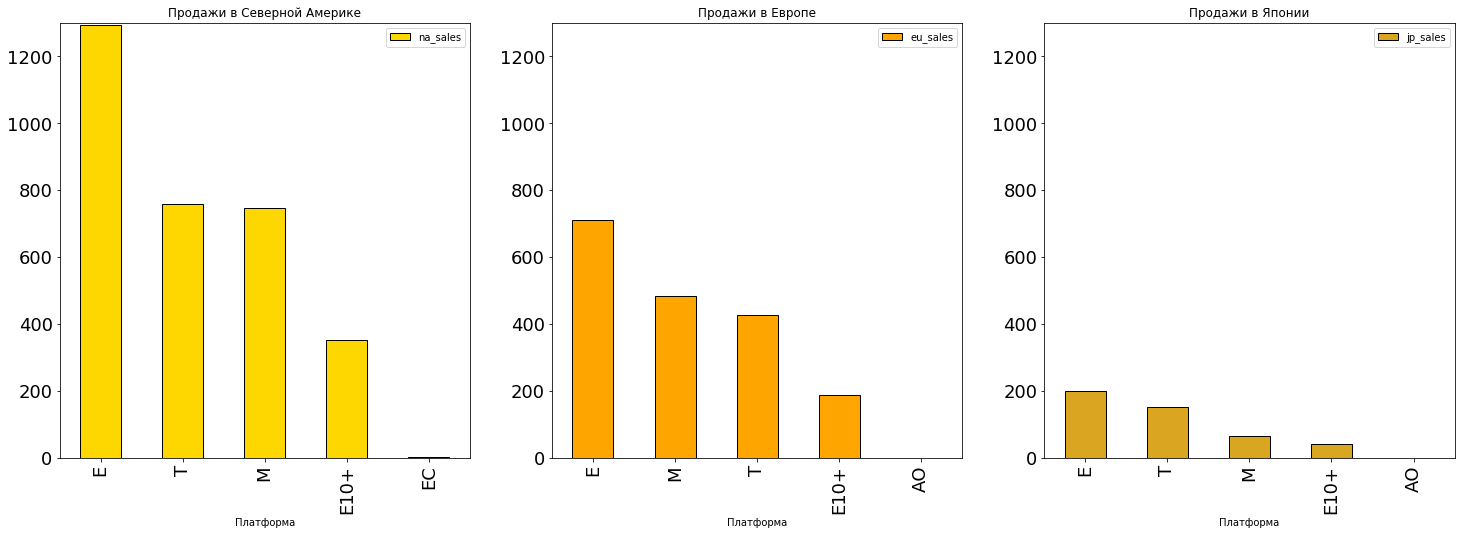

In [36]:
fig, axes = plt.subplots(1, 3, figsize=(25,8))

plot_for_regions(fillter_df, 'rating', 'na_sales', 0, (0, 1300))
plot_for_regions(fillter_df, 'rating', 'eu_sales', 1, (0, 1300))
plot_for_regions(fillter_df, 'rating', 'jp_sales', 2, (0, 1300))

Ситуация повторяется, в Северной Америке больше играющего населения. На первом месте с большим отрывом продажи игр рейтинга "Длля всех". В Америке и Японии чаще играют с раннего детства, в Европе же на втором месте игры для взрослых от 17 лет, следовательно там меньшее количество детей играет.

<a name="4.4"></a>
#### 4.4. Промежуточный вывод
<a class="btn btn-primary btn-sm" href="#content" role="button">Вернуться к содержанию</a>    

Таким образом был составлен портрет рядовго игрока в 3-х разные регионах. Получилось, что игроки из Северной Америки и Европы в целом схожи, а пользователи из Японии имеют отличия в выборе жанров и игровых платформ.
<hr>

<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>

Портрет пользователя получен верно. Хороший способ визуализации.

<a name="5"></a>
### 5. Шаг 5. Проверка гипотез
<a class="btn btn-primary btn-sm" href="#content" role="button">Вернуться к содержанию</a>   

Сформулируем гипотезы:
1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;    
2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые.

В обоих случаях выборки независимы между собой, распределение близко к нормальному. Для проверки обеих гипотез будем использовать t-критерий Стьюдента.
Определим пороговое значение alpha = 0.01, т.к. размер выборки больше 1000. 

<a name="5.1"></a>
#### 5.1. Гипотеза о равенстве пользовательских оценок платформ Xbox One и PC
<a class="btn btn-primary btn-sm" href="#content" role="button">Вернуться к содержанию</a>    

Постановка гипотезы:  
$H{_0} - $ cредние пользовательские рейтинги платформ Xbox One и PC **одинаковые**  
$H{_1} - $ cредние пользовательские рейтинги платформ Xbox One и PC **различаются**   
$\alpha = 1$% $-$ критический уровень статистической значимости.  
Если `p-value` меньше порогового значения `alpha`, то гипотезу отвергаем. Иначе - не отвергаем.

Возьмем срез с данными пользовательского рейтинга для платформмы XOne и PC. Проверим на равенство дисперсий критерием Левена:

In [37]:
xone = actual_data.query('platform == "XOne"')['user_score']
pc = actual_data.query('platform == "PC"')['user_score']

from scipy.stats import levene
stat, p = levene(xone, pc)
p

0.17047016121373734

In [38]:
import statsmodels.api as sm
import pylab as py



print('Тест Шапиро\nВыборка XONE p-value = {}\nВыборка PC p-values = {}'.format(stats.shapiro(xone)[1], stats.shapiro(pc)[1]))
print('Normaltest\nВыборка XONE p-value = {}\nВыборка PC p-values = {}'.format(stats.normaltest(xone)[1], stats.normaltest(pc)[1]))

sm.qqplot(xone, line ='45')
sm.qqplot(pc, line ='45')

NameError: name 'stats' is not defined

Не отвергаем нулевую гипотезу, следовательно дисперсии гомогенны.

In [ ]:
alpha = .01
result = st.ttest_ind(xone, pc, equal_var = True)

print('Средняя оценки пользователей Xone: {:.2f}'.format(xone.mean()),
      'Средняя оценки пользователей PC: {:.2f}\n'.format(pc.mean()), sep = '\n')
print('p-значение равно: {}\n'.format(result.pvalue))

if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу.')
else:
    print('Не удалось отвергнуть нулевую гипотезу.')

Верно следующее: cредние пользовательские рейтинги платформ Xbox One и PC одинаковые.

<a name="5.2"></a>
#### 5.2. Гипотеза о равенстве пользовательских оценок жанров Action и Sport
<a class="btn btn-primary btn-sm" href="#content" role="button">Вернуться к содержанию</a>    

Постановка гипотезы:  
$H{_0} - $ cредние пользовательские рейтинги жанров Action и Sport **одинаковые**  
$H{_1} - $ cредние пользовательские рейтинги платформ Action и Sport **различаются**   
$\alpha = 1$% $-$ критический уровень статистической значимости.  
Если `p-value` меньше порогового значения `alpha`, то гипотезу отвергаем. Иначе - не отвергаем.

Возьмем срез с данными пользовательского рейтинга для платформмы XOne и PC. Проверим на равенство дисперсий критерием Левена:

In [ ]:
action = actual_data.query('genre == "Action"')['user_score']
sport = actual_data.query('genre == "Sports"')['user_score']
stat, p = levene(action, sport)
p

Значнеие p куда больше критического уровня значимости, следовательно дисперсии гомогенны.

In [ ]:
alpha = .01
result = st.ttest_ind(action, sport, equal_var = True)

print('Средняя оценки пользователей жанра Action: {:.2f}'.format(action.mean()),
      'Средняя оценки пользователей жанра Sports: {:.2f}\n'.format(sport.mean()), sep = '\n')
print('p-значение равно: {}\n'.format(result.pvalue))

if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу.')
else:
    print('Не удалось отвергнуть нулевую гипотезу.')

Верным утверждением является, что cредние пользовательские рейтинги платформ Action и Sport не различаются. При выборе жанра для разработки игры стоит отдать предпочтение жанру Sports.
<hr>


<a name="6"></a>
### 6. Шаг 6. Общий вывод
<a class="btn btn-primary btn-sm" href="#content" role="button">Вернуться к содержанию</a>   

**На основе проведенного анализа можно выделить следующее:**
1. При выборе платформы для разрабоки игры стоит обратить внимания на **PS4**. Данная платформа лидирует по продажам за последний актуальный период. Не самым плохим вариантом остается платформа Xbox One, однако продажи для данной консоли меньше более, чем в 2 раза. Оно и понятно, Microsoft потеряла многие эксклюзивов. Данные приставки актуальны **для Америки и Европы**. В случае разработки игры **для Японского рынка** стоит обратить внимание на платформу **3DS**;
2. В выборе жанра для **Америки и Европы** наибольшую прибыль принесут **Action, Sports или Shooter**. Если разрабатываемая игра нацеленна на **Японский рынок**, то лучше выбрать жанр **Role-Playing**;

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(25,8))

plot_for_regions(df, 'genre', 'na_sales', 0, (0, 900))
plot_for_regions(df, 'genre', 'eu_sales', 1, (0, 900))
plot_for_regions(df, 'genre', 'jp_sales', 2, (0, 900))


3. Лучшим выбором рейтинга ESRB будет **E (для всех)**. Продажи игр данного рейтинга преобладают во всех регионах. Можно расмотреть рейтинг **T (от 13 лет и старше)** и **M (от 17 лет и старше)**. В целом выбор пользователями рейтинга для всех представленных регионов одинаков;

In [ ]:
fillter_df = df.query('rating != -1 and rating != "RP"')

fig, axes = plt.subplots(1, 3, figsize=(25,8))

plot_for_regions(fillter_df, 'rating', 'na_sales', 0, (0, 1300))
plot_for_regions(fillter_df, 'rating', 'eu_sales', 1, (0, 1300))
plot_for_regions(fillter_df, 'rating', 'jp_sales', 2, (0, 1300))


4. Оценки пользователей очень слабо или никак не влияют на продажи. Не стоит на них обращать внимания.  **Оценки критиков наоборот, умеренно влияют на продажи, на них стоит обращать внимание.** Если для разработчика важен пользовательский рейтинг и он выбирает между жанрами Action и Sports, то стоит отдать предпочтение жанру Sports, в нем средний пользовательский рейтинг выше.

Резюмирая, хочется сказать, что в целом рынок игровой индустрии постепенно умирает. Сейчааас разработчики гонятся за хорошей графикой, от чего средний бюджет нна разработку растет. Да и игрокам сейчас не так важна сюжетная составляющая или новая механика, как отличная картинка в игре. Рынок мобильных игр потихоньку вытясняет "немобильных". Уже сейчас на телефоне можно увидеть графику практически не уступающую платформам. Возможно в дальнейшем на рынке останутся только мобильные игры, а платформы будут использовать, к примеру, для VR-проектов.